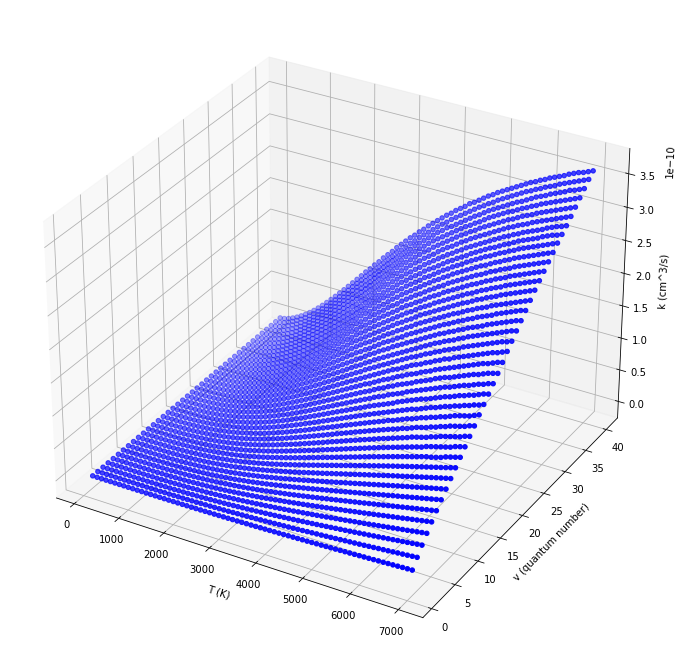

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('data/surface.csv')
df = df.drop('dE', axis=1)  

v = df['v\T']
T = df.columns[1:]
T = [int(t) for t in T]
v = [int(v) for v in v]
x, y = np.meshgrid(T, v)
z = np.array(df.iloc[:,1:])

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='b')
ax.set_xlabel('T (K)')
ax.set_ylabel('v (quantum number)')
ax.set_zlabel('k (cm^3/s)')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

t = x.reshape(-1)
v = y.reshape(-1)
X = np.column_stack((t, v)) 
Y = z.reshape(-1)

YL = np.log10(Y)
X_train, X_test, Y_train, Y_test = train_test_split(\
    X, YL, test_size=0.1, random_state=42)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import adam_v2 as adam

model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', \
            optimizer=adam.Adam(learning_rate=0.001), \
            metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=20, \
                    batch_size=64, verbose=1, validation_split=0.1)
model.save('model.h5')


Epoch 1/20
36/36 [==============================] - 1s 5ms/step - loss: 42596.5156 - mse: 42596.5156 - val_loss: 3606.2832 - val_mse: 3606.2832
Epoch 2/20
36/36 [==============================] - 0s 1ms/step - loss: 743.3082 - mse: 743.3082 - val_loss: 127.5939 - val_mse: 127.5939
Epoch 3/20
36/36 [==============================] - 0s 1ms/step - loss: 54.6704 - mse: 54.6704 - val_loss: 39.1042 - val_mse: 39.1042
Epoch 4/20
36/36 [==============================] - 0s 1ms/step - loss: 38.0262 - mse: 38.0262 - val_loss: 35.0783 - val_mse: 35.0783
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 37.2296 - mse: 37.2296 - val_loss: 34.7644 - val_mse: 34.7644
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 36.8328 - mse: 36.8328 - val_loss: 34.5721 - val_mse: 34.5721
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 36.6504 - mse: 36.6504 - val_loss: 34.4414 - val_mse: 34.4414
Epoch 8/20
36/36 [==============================

min loss:  30.04009246826172
min val_loss:  26.83810043334961


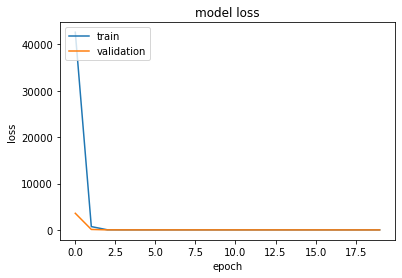

In [4]:
print("min loss: ", min(history.history['loss']))
print("min val_loss: ", min(history.history['val_loss']))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

rmse:  5.150392745149612


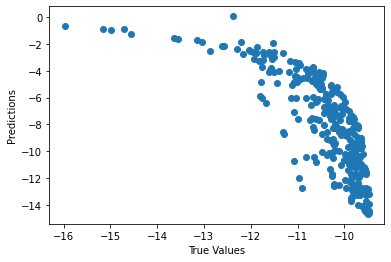

In [5]:
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('rmse: ', rmse)
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [6]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
scalerx.fit(X)
Xs = scalerx.transform(X)

YL = np.log10(Y)
# IMPORTANT we should use the same scaler for training and test set 
# and the scaler should be fitted only using the training set to be fair  
scalery = MinMaxScaler()
scalery.fit(YL.reshape(-1,1))
YLs = scalery.transform(YL.reshape(-1,1))

X_train, X_test, Y_train, Y_test = train_test_split(\
    Xs, YLs, test_size=0.1, random_state=42)

In [7]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', \
            optimizer=adam.Adam(learning_rate=0.001), \
            metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=20, \
                    batch_size=64, verbose=1, validation_split=0.1)
model.save('model.h5')

Epoch 1/20
36/36 [==============================] - 0s 4ms/step - loss: 0.2406 - mse: 0.2406 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 2/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 3/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 6/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 8/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.00

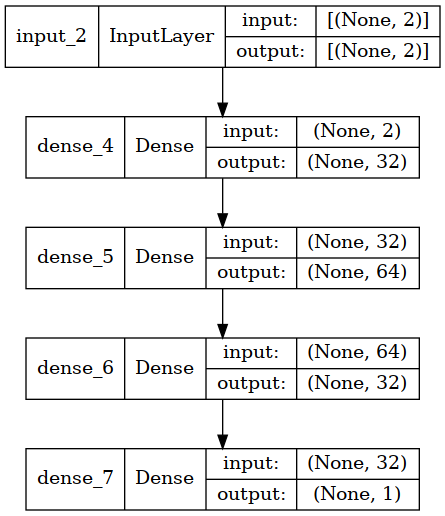

In [10]:
# plot the layers structure using keras
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png',\
            show_shapes=True, show_layer_names=True)

min loss:  5.30519027961418e-05
min val_loss:  5.0720085710054263e-05


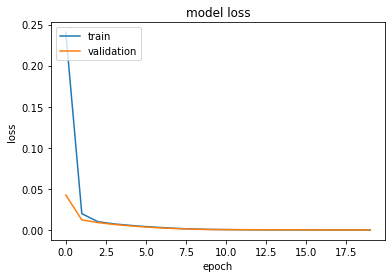

In [8]:
print("min loss: ", min(history.history['loss']))
print("min val_loss: ", min(history.history['val_loss']))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

rmse:  0.047275215445131295


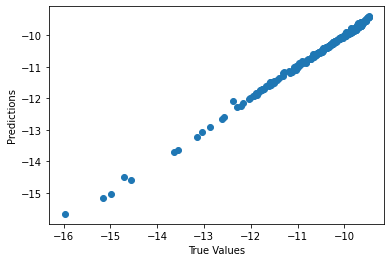

In [9]:
Y_pred = model.predict(X_test)
Y_pred = scalery.inverse_transform(Y_pred)
Y_test = scalery.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('rmse: ', rmse)
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()